<a href="https://colab.research.google.com/github/YuvalMedina/Math/blob/master/Tetration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np

In [0]:
def tetration(a,b):
  #this performs tetration, i.e a^a^a... b times
  t = 1.0
  for i in range(b):
    t = math.pow(a, t)
    print("Step " + repr(i) + ": " + repr(t))
  return t

def tetration_inf(a):
  assert(a <= math.pow(math.e, 1/math.e) and a >= math.pow(math.e, -math.e))
  t = 1.0
  t_last = 0.0
  while(t - t_last > 10**-15):
    t_last = t
    t = math.pow(a, t)
  return t

In [0]:
tetration(1.1, 50)

Step 0: 1.1
Step 1: 1.1105342410545758
Step 2: 1.1116498000257782
Step 3: 1.1117680015030489
Step 4: 1.111780526534057
Step 5: 1.1117818537372586
Step 6: 1.111781994373198
Step 7: 1.1117820092755646
Step 8: 1.1117820108546812
Step 9: 1.111782011022011
Step 10: 1.1117820110397418
Step 11: 1.1117820110416208
Step 12: 1.11178201104182
Step 13: 1.111782011041841
Step 14: 1.1117820110418433
Step 15: 1.1117820110418435
Step 16: 1.1117820110418435
Step 17: 1.1117820110418435
Step 18: 1.1117820110418435
Step 19: 1.1117820110418435
Step 20: 1.1117820110418435
Step 21: 1.1117820110418435
Step 22: 1.1117820110418435
Step 23: 1.1117820110418435
Step 24: 1.1117820110418435
Step 25: 1.1117820110418435
Step 26: 1.1117820110418435
Step 27: 1.1117820110418435
Step 28: 1.1117820110418435
Step 29: 1.1117820110418435
Step 30: 1.1117820110418435
Step 31: 1.1117820110418435
Step 32: 1.1117820110418435
Step 33: 1.1117820110418435
Step 34: 1.1117820110418435
Step 35: 1.1117820110418435
Step 36: 1.111782011041

1.1117820110418435

In [0]:
b = tetration_inf(1.1)
math.pow(b, 1/b)

1.1

In [0]:
import cmath

def tetration_inf2(a, tol=10**-15, max_step=10**8):
  # returns t, the infinite tetration of a.
  # if t does not converge, the function returns an escape value.
  #if(a.imag == 0):
  #  assert(a <= math.pow(math.e, 1/math.e) and a >= math.pow(math.e, -math.e))
  t = 1.0
  t_last = 0.0
  step = 0
  escape = None
  ln_a = cmath.log(a)
  while(abs(t - t_last) > tol):
    try:
      if(step > max_step):
        print("approaching stack overflow")
        raise OverflowError
      t_last = t
      t = cmath.exp(ln_a*t)
      step += 1
    except(OverflowError):
      t = None
      escape = 1000/step   # the escape value is greater if we reached overflow at a smaller step
      break
  return t, escape

In [0]:
tetration_inf2(1.1)

((1.1117820110418435+0j), None)

In [0]:
tetration_inf2(2)

(None, 250.0)

In [0]:
tetration_inf2(20)

(None, 500.0)

In [0]:
tetration_inf2(1.45)

(None, 23.25581395348837)

In [0]:
tetration_inf2(1.448)

(None, 18.181818181818183)

In [0]:
upper_tet = math.pow(math.e, 1/math.e)
lower_tet = math.pow(math.e, -math.e)
tetration_inf2(upper_tet + 10**-11)

approaching stack overflow


(None, 0.000999999000001)

In [0]:
tetration_inf2(upper_tet)

approaching stack overflow


(None, 9.9999990000001e-05)

In [0]:
tetration_inf2(upper_tet - 10**-13)
#does not terminate after 10**-13

((2.7182801590009764+0j), None)

In [0]:
tetration_inf2(lower_tet+10**-10)

approaching stack overflow


(None, 9.9999990000001e-05)

In [0]:
tetration_inf2(lower_tet-10**-1) #wrong, we need to check for oscillating variables

approaching stack overflow


(None, 0.000999999000001)

In [0]:
tetration_inf2(1j)

((0.43828295217132285+0.3605924671908542j), None)

In [0]:
def tetration_inf(a, tol=10**-15, max_step=10**6):
  # returns t, the infinite tetration of a.
  # if t does not converge, the function returns an escape value.
  #if(a.imag == 0):
  #  assert(a <= math.pow(math.e, 1/math.e) and a >= math.pow(math.e, -math.e))
  t = 1.0
  t_last = 0.0
  step = 0
  escape = None
  while(t - t_last > tol):
    try:
      if(step > max_step):
        raise OverflowError
      t_last = t
      t = math.pow(a, t)
      step += 1
    except(OverflowError):
      t = None
      escape = 1000/step   # the escape value is greater if we reached overflow at a smaller step
      break
  return t, escape
  import cmath

def tetration_com(base, tol=10**-15, max_step=10**6, max_val=10**2):
  # returns t, the infinite tetration of base.
  # if t does not converge, the function returns an escape value
  # aka how fast it diverges..

  t = 1.0
  step = 0
  escape = None

  t_last = 0
  try:
    while(abs(t - t_last) > tol):
      if(step > max_step or abs(t) > max_val):
        raise OverflowError
      t_last = t
      t = pow(base, t)
      step += 1
  except(OverflowError):
    t = None
    escape = 1000/step
    # the escape value is is inversely related to the number of steps it took
    # us to diverge to infinity

  return t, escape

In [0]:
tetration_com(1.1)

(1.1117820110418435, None)

In [0]:
def tetra_graph_escape(real, imag, tol=10**-15, max_step=10**3, max_val=10**2):
  return np.array([np.array([tetration_com(r + im*1j, tol=tol, max_step=max_step, max_val=max_val)[1]
                             for im in imag]) for r in real])

def tetra_graph_conv(real, imag, tol=10**10-15, max_step=10**3, max_val=10**2):
  return np.array([np.array([tetration_com(r + im*1j, tol=tol, max_step=max_step, max_val=max_val)[0]
                             for im in imag]) for r in real])

In [0]:
# graph our escape:
nx, ny = 700, 500
x, y = np.linspace(-3.5, 3.5, nx), np.linspace(-2.5, 2.5, ny)

val, escape = tetra_graph_conv(x, y), tetra_graph_escape(x, y)

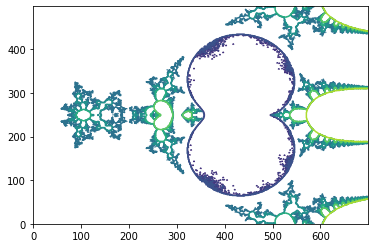

In [0]:
import matplotlib.pyplot as plt

for r in range(len(escape)):
  for c in range(len(escape[0])):
    if escape[r][c] is None:
      escape[r][c] = -100

escape[460][250]

plt.contour(escape.T)